<a href="https://www.kaggle.com/code/pruthvikmachhi/svm-numeric-example-for-hyperplane?scriptVersionId=177069070" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/svm-numeric-example-dataset/Dataset for svm numeric example.csv


In [2]:
import pandas as pd 
df=pd.read_csv("/kaggle/input/svm-numeric-example-dataset/Dataset for svm numeric example.csv")
df

,Positive Label (Pos):,Negative Label (Neg):
0,"(3, 2)","(1, 1)"
1,"(4, 1)","(2, 0)"
2,"(4, -1)","(2, 2)"
3,"(5, 2)","(-1, 1)"
4,"(5, 0)","(-1, -1)"
5,"(6, 2)","(0, 2)"
6,"(6, 0)","(0, -2)"
7,"(7, 1)","(-2, 1)"
8,"(7, -1)","(-2, -1)"
9,"(8, 2)","(-3, 0)"


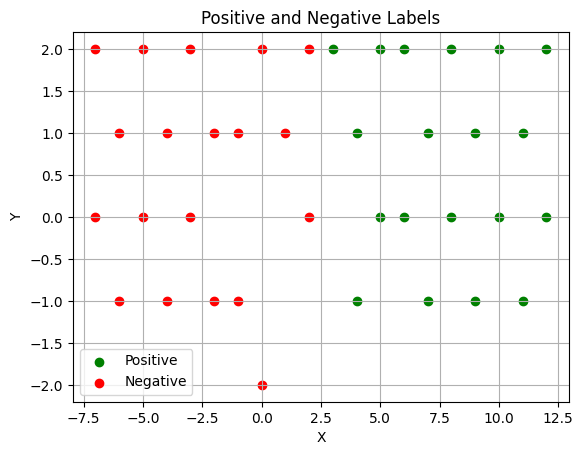

In [3]:
import matplotlib.pyplot as plt

data = [
    ((3, 2), (1, 1)),
    ((4, 1), (2, 0)),
    ((4, -1), (2, 2)),
    ((5, 2), (-1, 1)),
    ((5, 0), (-1, -1)),
    ((6, 2), (0, 2)),
    ((6, 0), (0, -2)),
    ((7, 1), (-2, 1)),
    ((7, -1), (-2, -1)),
    ((8, 2), (-3, 0)),
    ((8, 0), (-3, 2)),
    ((9, 1), (-4, 1)),
    ((9, -1), (-4, -1)),
    ((10, 2), (-5, 0)),
    ((10, 0), (-5, 2)),
    ((11, 1), (-6, 1)),
    ((11, -1), (-6, -1)),
    ((12, 2), (-7, 0)),
    ((12, 0), (-7, 2))
]



positive_labels = [pos for pos, _ in data]
negative_labels = [neg for _, neg in data]


positive_x, positive_y = zip(*positive_labels)
negative_x, negative_y = zip(*negative_labels)


plt.scatter(positive_x, positive_y, color='green', label='Positive')
plt.scatter(negative_x, negative_y, color='red', label='Negative')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Positive and Negative Labels')
plt.legend()


plt.grid(True)
plt.show()


## from the graph we can see that (2,2,1) and (2,0,1) ,(3,2,1)  ara the support vectors

In [4]:
s1 = (2, 2, 1) #negative
s2 = (2, 0, 1) #negative
s3 = (3, 2, 1) #positive


In [5]:
'''# Equations
alpha_1 * s1[0] * s1[0] + alpha_2 * s1[0] * s2[0] + alpha_3 * s1[0] * s3[0] = -1
alpha_1 * s2[1] * s1[1] + alpha_2 * s2[1] * s2[1] + alpha_3 * s2[1] * s3[1] = -1
alpha_1 * s3[2] * s1[2] + alpha_2 * s3[2] * s2[2] + alpha_3 * s3[2] * s3[2] = 1
'''

'# Equations\nalpha_1 * s1[0] * s1[0] + alpha_2 * s1[0] * s2[0] + alpha_3 * s1[0] * s3[0] = -1\nalpha_1 * s2[1] * s1[1] + alpha_2 * s2[1] * s2[1] + alpha_3 * s2[1] * s3[1] = -1\nalpha_1 * s3[2] * s1[2] + alpha_2 * s3[2] * s2[2] + alpha_3 * s3[2] * s3[2] = 1\n'

## Equations
## alpha_1 * s1[0] * s1[0] + alpha_2 * s1[0] * s2[0] + alpha_3 * s1[0] * s3[0] = -1
## alpha_1 * s2[1] * s1[1] + alpha_2 * s2[1] * s2[1] + alpha_3 * s2[1] * s3[1] = -1
## alpha_1 * s3[2] * s1[2] + alpha_2 * s3[2] * s2[2] + alpha_3 * s3[2] * s3[2] = 1


In [6]:
import numpy as np


s1 = np.array([2, 2, 1])
s2 = np.array([2, 0, 1])
s3 = np.array([3, 2, 1])

dot_s1_s1 = np.dot(s1, s1)
dot_s1_s2 = np.dot(s1, s2)
dot_s1_s3 = np.dot(s1, s3)
dot_s2_s1 = np.dot(s2, s1)
dot_s2_s2 = np.dot(s2, s2)
dot_s2_s3 = np.dot(s2, s3)
dot_s3_s1 = np.dot(s3, s1)
dot_s3_s2 = np.dot(s3, s2)
dot_s3_s3 = np.dot(s3, s3)


a1 = dot_s1_s1
b1 = dot_s1_s2
c1 = dot_s1_s3
a2 = dot_s2_s1
b2 = dot_s2_s2
c2 = dot_s2_s3
a3 = dot_s3_s1
b3 = dot_s3_s2
c3 = dot_s3_s3


print(f"a1 = {a1}, b1 = {b1}, c1 = {c1}")
print(f"a2 = {a2}, b2 = {b2}, c2 = {c2}")
print(f"a3 = {a3}, b3 = {b3}, c3 = {c3}")





a1 = 9, b1 = 5, c1 = 11
a2 = 5, b2 = 5, c2 = 7
a3 = 11, b3 = 7, c3 = 14


## now we have to find the value of alpha_1,alpha_2,alpha_3

# Cramer rule for finding value of alpha 

In [7]:
def determinant_2x2(matrix):
    return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

def determinant_3x3(matrix):
    a, b, c = matrix[0]
    d, e, f = matrix[1]
    g, h, i = matrix[2]
    return a * determinant_2x2([[e, f], [h, i]]) - b * determinant_2x2([[d, f], [g, i]]) + c * determinant_2x2([[d, e], [g, h]])

def cramer_rule(matrix, b_vector):
    det_matrix = determinant_3x3(matrix)
    x = []
    for i in range(3):
        modified_matrix = [row[:] for row in matrix]
        for j in range(3):
            modified_matrix[j][i] = b_vector[j]
        x.append(determinant_3x3(modified_matrix) / det_matrix)
    return x


matrix = [[9, 5, 11],
          [5, 5, 7],
          [11, 7, 14]]
b_vector = [-1, -1, 1]


solution = cramer_rule(matrix, b_vector)
print("Solution for the system of equations:")
print("alpha_1 =", solution[0])
print("alpha_2 =", solution[1])
print("alpha_3=", solution[2])


Solution for the system of equations:
alpha_1 = -12.0
alpha_2 = -5.0
alpha_3= 12.0


## hyperplane

### W = Σ αᵢ * sᵢ
### y = W*x + b
### W = -12 * (2, 2, 1) + 5 * (2, 0, 1) + 12* (3, 2, 1)



In [8]:

import numpy as np
v1 = np.array([2, 2, 1])
v2 = np.array([2, 0, 1])
v3 = np.array([3, 2, 1])

c1 = -12
c2 = 5
c3 = 12

result = c1 * v1 + c2 * v2 + c3 * v3

print("Result:", result)




Result: [22  0  5]


## w = (22 ,0)
## b = 5

## y = (22,0)*x + 5

**If you want to learn more about above example check out the below link**

https://medium.com/@pruthvikmachhi/svm-numerical-example-hyperplane-with-code-in-python-4a15293bb102